In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
import pathlib

In [6]:
# Define the base path of the dataset
base_path = "D:\Projects\Laryngeal_Project\dataset"

# Define the classes
classes = ['He', 'Hbv', 'IPCL', 'Le']
classes_label = {
    'He': 0,
    'Hbv': 1,
    'IPCL': 2,
    'Le': 3,
}

In [8]:
IMG_SIZE = (100, 100)
def apply_gaussian_filter(image, ksize=(5, 5), sigmaX=0):
    return cv2.GaussianBlur(image, ksize, sigmaX)

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = apply_gaussian_filter(image)
    return cv2.resize(image, IMG_SIZE)

def load_dataset(base_path, classes):
    data, labels = [], []

    for fold in ['FOLD 1', 'FOLD 2', 'FOLD 3']:
        for tissue_class in classes:
            class_path = os.path.join(base_path, fold, tissue_class)

            # Find all PNG files using glob
            image_paths = glob.glob(f"{class_path}/*.png")

            print(f"Loading {len(image_paths)} images from {class_path}...")

            for img_path in tqdm(image_paths, desc=f"Processing {tissue_class}"):
                # Read image
                image = cv2.imread(img_path)

                if image is not None:
                    preprocessed_image = preprocess_image(image)
                    data.append(preprocessed_image)
                    labels.append(classes_label[tissue_class])
    return np.array(data), np.array(labels)


In [10]:
# Load the entire dataset
data, labels = load_dataset(base_path,classes)
print(f"Total images loaded: {len(data)}")

# Create a DataFrame
df = pd.DataFrame({'image': list(data), 'label': labels})

print(df.head())

Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 1\He...


Processing He: 100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 1782.72it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 1\Hbv...


Processing Hbv: 100%|██████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 2989.51it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 1\IPCL...


Processing IPCL: 100%|█████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 2889.33it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 1\Le...


Processing Le: 100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 3158.90it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 2\He...


Processing He: 100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 2272.05it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 2\Hbv...


Processing Hbv: 100%|██████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 2967.74it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 2\IPCL...


Processing IPCL: 100%|█████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 3321.29it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 2\Le...


Processing Le: 100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 2860.73it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 3\He...


Processing He: 100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 1835.82it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 3\Hbv...


Processing Hbv: 100%|██████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 1885.56it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 3\IPCL...


Processing IPCL: 100%|█████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 3040.09it/s]


Loading 110 images from D:\Projects\Laryngeal_Project\dataset\FOLD 3\Le...


Processing Le: 100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 2959.57it/s]

Total images loaded: 1320


                                               image  label
0  [[[144, 99, 93], [144, 99, 93], [144, 99, 93],...      0
1  [[[222, 170, 157], [223, 170, 157], [224, 170,...      0
2  [[[177, 122, 115], [178, 123, 116], [178, 123,...      0
3  [[[220, 143, 137], [220, 143, 137], [220, 143,...      0
4  [[[155, 108, 102], [155, 108, 102], [154, 107,...      0


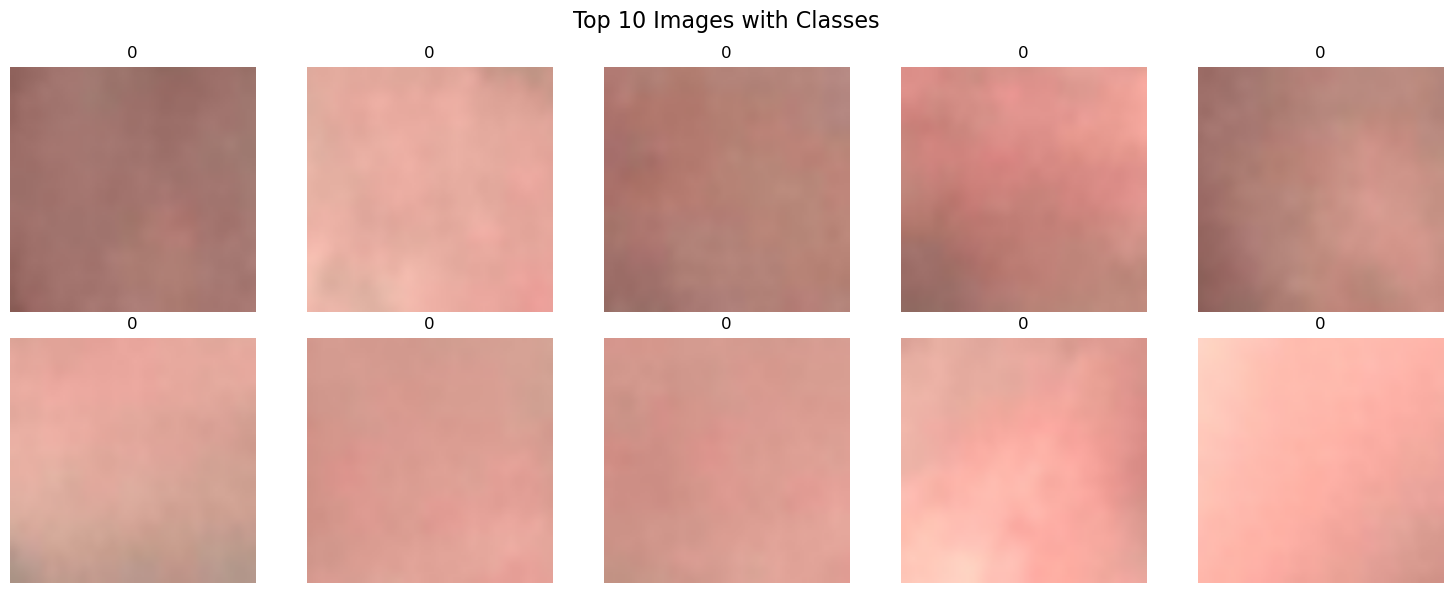

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_images = df.head(10)['image'].tolist()

fig, axes = plt.subplots(2, 5, figsize=(15, 6)) 
for i, image in enumerate(top_10_images):
    axes.flat[i].imshow(image)
    axes.flat[i].set_title(df.loc[i, 'label'])
    axes.flat[i].axis('off')

fig.suptitle('Top 10 Images with Classes', fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
X = np.array(df['image'].tolist())
y = np.array(df['label'].tolist())
X = X/255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet201

In [18]:
base_dense201 = DenseNet201(
    weights='imagenet', include_top=False, input_shape=(100, 100, 3)
)

model_dense201_layers = [
    base_dense201,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')
]

model_dense201 = Sequential(model_dense201_layers)

for layer in model_dense201.layers[-5:]:        # Unfreeze the last few layers for training
    layer.trainable = True
    
model_dense201.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_dense201.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 3, 3, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1967104   
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 20293188 (77.41 MB)
Trainable params: 20064132 (76.54 MB)
Non-trainable params: 229056 (894.75 KB)
_________________________________________________________________


In [26]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)

In [28]:
# Perform manual cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = model_dense201
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose = 1)
    
    # Predict labels on the test data
    y_pred = model.predict(X_test)


Epoch 1/10


22/22 [==============================] - 79s 2s/step - loss: 0.6794 - accuracy: 0.8040 - val_loss: 83.9934 - val_accuracy: 0.4773
Epoch 2/10
22/22 [==============================] - 30s 1s/step - loss: 0.2737 - accuracy: 0.9318 - val_loss: 434.7705 - val_accuracy: 0.2386
Epoch 3/10
22/22 [==============================] - 34s 2s/step - loss: 0.1232 - accuracy: 0.9602 - val_loss: 48.1082 - val_accuracy: 0.5540
Epoch 4/10
22/22 [==============================] - 31s 1s/step - loss: 0.1820 - accuracy: 0.9418 - val_loss: 4.2392 - val_accuracy: 0.6676
Epoch 5/10
22/22 [==============================] - 30s 1s/step - loss: 0.2136 - accuracy: 0.9389 - val_loss: 15.3144 - val_accuracy: 0.4176
Epoch 6/10
22/22 [==============================] - 30s 1s/step - loss: 0.1607 - accuracy: 0.9474 - val_loss: 14.0740 - val_accuracy: 0.5057
Epoch 7/10
22/22 [==============================] - 31s 1s/step - loss: 0.1148 - accuracy: 0.9588 - val_loss: 1.0751 - val_accuracy: 0.7273
Epoch 8/10
2

In [29]:
y_pred = np.argmax(model_dense201.predict(X_test), axis=-1)

11/11 [==============================] - 3s 311ms/step


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       121
           1       0.99      1.00      0.99        87
           2       1.00      1.00      1.00        77
           3       0.99      0.99      0.99        67

    accuracy                           0.99       352
   macro avg       0.99      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352



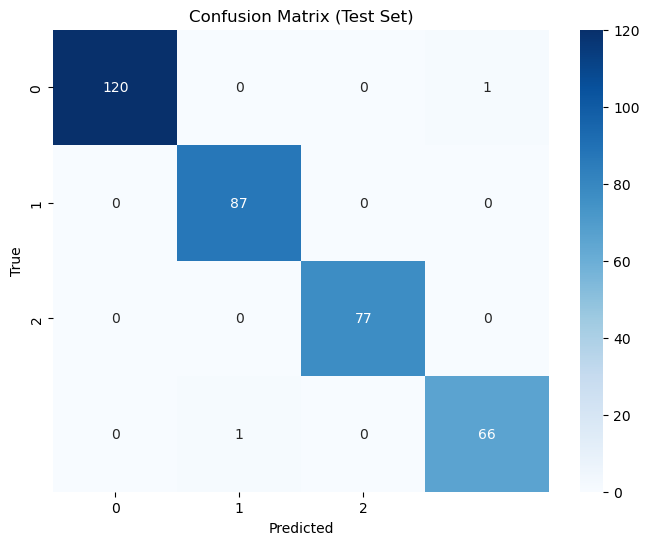

Overall Accuracy: 0.9943181818181818


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Calculate and print the overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", overall_accuracy)


In [32]:
y_pred_train = np.argmax(model_dense201.predict(X_train), axis=-1)

22/22 [==============================] - 7s 339ms/step


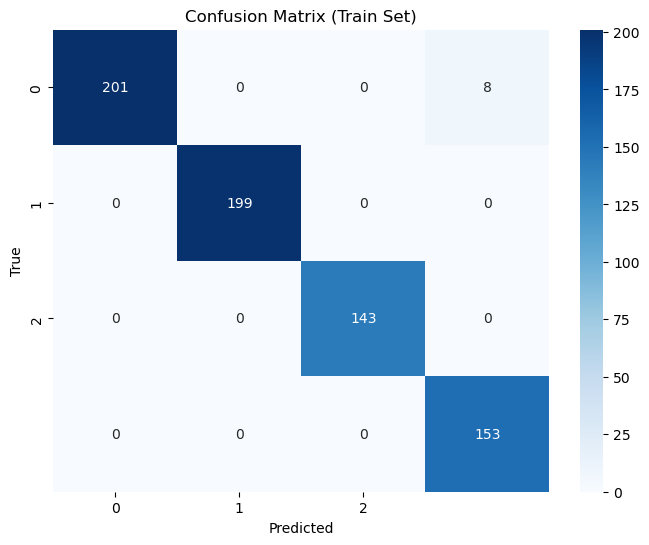

Overall Accuracy: 0.9886363636363636


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()

# Calculate and print the overall accuracy
overall_accuracy = accuracy_score(y_train, y_pred_train)
print("Overall Accuracy:", overall_accuracy)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       209
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00       143
           3       0.95      1.00      0.97       153

    accuracy                           0.99       704
   macro avg       0.99      0.99      0.99       704
weighted avg       0.99      0.99      0.99       704

